# Can we make a change on climate change?
#### EPA1333 Final Assignment
### Introduction
Regardless of the many debates over the impact of humans on climate change, global warming is an observable fact. According to NASA, highest 16 global temperatures have been recorded since 2001, the arctic ice shrank to a minimum in 2012, and carbon dioxide levels in the air are higher than ever!

Data analysis can help us better understand how the climate has changed, why, to make predictions for the future years, and to evaluate measures on how to suppress these changes. In this assignment you receive climate change data from World Bank, and are expected to perform an original and non-trivial analysis using Python.

### Data

#### Climate change indicators
The climate change data offered by World Bank contains a large set of indicators, such as for example CO2 emissions, population growth or renewable energy output. Values of these indicators are available per country and per year. You can download the data in *.csv format from https://data.worldbank.org/topic/climate-change.

In [2]:
# import standard library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# load world bank data
# skip the unneeded header
wb = pd.read_csv('world_bank/API_19_DS2_en_csv_v2.csv', sep=',', header=0, skiprows=3) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb = wb.drop(wb.columns[[61]], 1)

# display the head of dataframe
wb.head(8)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,NaN


In [4]:
#load country metadata
wb_meta_country = pd.read_csv('world_bank/Metadata_Country_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_country = wb_meta_country.drop(wb_meta_country.columns[[5]], 1)

# display the head of dataframe
wb_meta_country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


In [5]:
#load indicator metadata
wb_meta_indi = pd.read_csv('world_bank/Metadata_Indicator_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_indi = wb_meta_indi.drop(wb_meta_indi.columns[[4]], 1)

# display the head of dataframe
wb_meta_indi.head()


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in ur...,The United Nations Population Divisions World ...
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...


#### Climate data API
The Climate Data API provides programmatic access to most of the climate data used on the World Bank’s Climate Change Knowledge Portal. You can access this data directly from Python using requests. In addition to what was already downloadable as csv data, with this API you are able to access temperature, precipitation and basin level data. Read about it in more detail here: https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

Below is an example of how to access yearly temperature historical data per country from Python. You can select a country using its ISO aplha3 code: https://unstats.un.org/unsd/methodology/m49/.


In [6]:
import requests
r = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/IDN')
rou = r.json()
rou[:]

[{'data': 25.897385, 'year': 1901},
 {'data': 25.891254, 'year': 1902},
 {'data': 25.89029, 'year': 1903},
 {'data': 25.81223, 'year': 1904},
 {'data': 25.89114, 'year': 1905},
 {'data': 25.93108, 'year': 1906},
 {'data': 25.845016, 'year': 1907},
 {'data': 25.859482, 'year': 1908},
 {'data': 25.884674, 'year': 1909},
 {'data': 25.87435, 'year': 1910},
 {'data': 26.001455, 'year': 1911},
 {'data': 26.063465, 'year': 1912},
 {'data': 25.996037, 'year': 1913},
 {'data': 26.086746, 'year': 1914},
 {'data': 26.122044, 'year': 1915},
 {'data': 26.017483, 'year': 1916},
 {'data': 25.89649, 'year': 1917},
 {'data': 25.81522, 'year': 1918},
 {'data': 26.058826, 'year': 1919},
 {'data': 26.046621, 'year': 1920},
 {'data': 25.961288, 'year': 1921},
 {'data': 25.94628, 'year': 1922},
 {'data': 25.913263, 'year': 1923},
 {'data': 25.936886, 'year': 1924},
 {'data': 25.812534, 'year': 1925},
 {'data': 26.039835, 'year': 1926},
 {'data': 25.97557, 'year': 1927},
 {'data': 25.980175, 'year': 1928},
 

As with most data sources, you might find that you data contains missing values. Please handle them appropriately, for example by using interpolation.

#### Other resources
You are encouraged to find more data sources that will make your analysis more meaningful. Please make sure that you document everything carefully. Only use freely available datasets.

#### Assignment
* Create a Jupyter Notebook that contains your explanations and analyses.
* Start the notebook with a clear description of the type of analysis you are going to perform.
* The conceptual contents of the Notebook should be roughly similar to a normal written report of 10-20 pages.
* Some (minimum) properties of the Notebook and your analyses on which we will grade:
    * Required: Combine different data from multiple sources in your analyses.
    * Required: Use multiple types of visualizations of your results.
    * Required: Make sure your Notebook does not generate errors!
    * Required: You should use Python to answer your research questions. Your code should read, clean and format, process and visualize the data. There should be at least some non-trivial processing involved.
    * Whenever possible, make your Notebook read the data directly from the web. This way, your notebook will always use the most up-to-date data available. If not, document carefully where the data was collected what to do when you want to use more up-to-date data.
    * Demonstrate your skills in Python by using typical Python constructs and using the appropriate data structures (lists, dictionaries, tuples, arrays, dataframes, series, recursion, etc.)
    * Write clear, understandable code:
        * Document your code! Put comments when necessary.
        * Use sensible variable names.
        * Break up your code into parts. Use (fruitful) functions.
    * Try to think of reusability of your code. How easy would it be to use your same code if we want to try to do a small variations of your analysis? Can we easily adapt/play around with your code?
    * How difficult were your analyses?
* Make your Notebook self-explanatory. So, it should contain text (with references) as well as your actual analysis code and results.
* If you want to use other libraries for your analyses or visualizations, feel free to do so. However, only use free available and well-known libraries. The ones that come standard with Anaconda are fine. If you want to use something else, that you first need to install, check with us first.
* Create a zip archive and upload it on Brightspace.

#### Example
Here are some example questions you might ask to start the analysis. Please note that this is just an example and that you are expected to come up with your own questions and analyses.
* The EU has the following goal in the Paris agreement: "At least a 40% domestic reduction in greenhouse gases by 2030 compared to 1990 levels.” How is the EU doing at the moment? If they don’t change policy (i.e extrapolation of current trends) where will they end up? [source]
* Can you classify in good/neutral/bad countries?
* What is the trend per continent with respect to gas emissions? How do countries within the same continent behave? Is it fair to make statements over whole continents?
* Where do you find the highest increase in temperatures compared to 1960?
* Suppose that each country has a % growth or reduction of CO2, where do we end up?
* What are the countries with most gas emissions? How does that change when you normalize by their size / population?
* What is the country with the best trend in renewable energy over the last 10 years?

In [7]:
temp_column = wb.columns.values[range(4,61)]
temp_column

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [8]:
wb_prep = pd.DataFrame()
wb_prep = wb[temp_column]
wb_prep.columns = range(0,57)
wb_prep

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,0.524658,0.459929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,97.700000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,98.100000,NaN


In [64]:
wb_interpolated = wb_prep.interpolate(method='krogh',limit_direction='both',limit=56, axis=1)
# wb_interpolated = wb_prep.interpolate(method='pchip',limit_direction='both',limit=56,axis=1)
# wb_interpolated = wb_prep.interpolate(method='barycentric',limit_direction='both',limit=56,axis=1)

In [65]:
wb_interpolated

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,5.077600e+01,5.076100e+01,5.074600e+01,5.073000e+01,5.071500e+01,5.070000e+01,5.068500e+01,5.067000e+01,5.065400e+01,5.063900e+01,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01
1,2.752600e+04,2.814100e+04,2.853200e+04,2.876100e+04,2.892400e+04,2.908200e+04,2.925300e+04,2.941600e+04,2.957500e+04,2.973800e+04,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04
2,3.117931e+00,2.209658e+00,1.379868e+00,7.994038e-01,5.651398e-01,5.447726e-01,5.862706e-01,5.556611e-01,5.390666e-01,5.496279e-01,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02
3,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,5.805500e+04,5.838600e+04,5.872600e+04,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
4,3.148037e+00,2.238144e+00,1.409622e+00,8.324526e-01,5.926490e-01,5.734682e-01,6.169909e-01,5.873732e-01,5.685298e-01,5.806424e-01,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.636205e+20,4.671991e+20,2.487142e+20,1.301754e+20,6.692089e+19,3.375478e+19,1.668555e+19,8.072689e+18,3.817251e+18,1.761383e+18,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,-4.966768e+05
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.072318e+20,4.899905e+20,2.604023e+20,1.360496e+20,6.981012e+19,3.514317e+19,1.733618e+19,8.369380e+18,3.948566e+18,1.817623e+18,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,9.810000e+01,-8.161121e+05


In [104]:
wb[:80].isnull().any(axis=1).sum()

75

In [105]:
wb_interpolated[:80].isnull().any(axis=1).sum()

30

In [106]:
wb_interpolated[80:160].isnull().any(axis=1).sum()

26

In [107]:
wb_interpolated[160:240].isnull().any(axis=1).sum()

4

In [135]:
wb['Country Name'][80]

'Afghanistan'

In [140]:
for i in range(0,21120,80):
    #print(i)
    print(wb['Country Name'][i],'\t',wb_interpolated[i:i+80].isnull().any(axis=1).sum())


Aruba 	 30
Afghanistan 	 26
Angola 	 4
Albania 	 3
Andorra 	 46
Arab World 	 12
United Arab Emirates 	 7
Argentina 	 2
Armenia 	 10
American Samoa 	 44
Antigua and Barbuda 	 18
Australia 	 2
Austria 	 12
Azerbaijan 	 10
Burundi 	 24
Belgium 	 4
Benin 	 2
Burkina Faso 	 24
Bangladesh 	 0
Bulgaria 	 2
Bahrain 	 8
Bahamas, The 	 22
Bosnia and Herzegovina 	 6
Belarus 	 3
Belize 	 15
Bermuda 	 33
Bolivia 	 8
Brazil 	 2
Barbados 	 17
Brunei Darussalam 	 10
Bhutan 	 22
Botswana 	 10
Central African Republic 	 25
Canada 	 2
Central Europe and the Baltics 	 11
Switzerland 	 3
Channel Islands 	 68
Chile 	 1
China 	 2
Cote d'Ivoire 	 2
Cameroon 	 3
Congo, Dem. Rep. 	 3
Congo, Rep. 	 2
Colombia 	 2
Comoros 	 15
Cabo Verde 	 12
Costa Rica 	 2
Caribbean small states 	 21
Cuba 	 9
Curacao 	 53
Cayman Islands 	 33
Cyprus 	 6
Czech Republic 	 10
Germany 	 2
Djibouti 	 14
Dominica 	 18
Denmark 	 4
Dominican Republic 	 2
Algeria 	 1
East Asia & Pacific (excluding high income) 	 8
Early-demographic divide

In [103]:
wb_inter = pd.DataFrame()
wb_inter = wb[wb.columns.values]
wb_inter

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,0.524658,0.459929
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,97.700000,NaN
8,Aruba,ABW,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aruba,ABW,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,98.100000,NaN


In [108]:
wb_inter[:80].isnull().any(axis=1).sum()

75

In [112]:
wb_inter[list(wb.columns.values[range(4,61)])] = wb_interpolated[list(range(0,57))]
wb_inter[:80]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,5.077600e+01,5.076100e+01,5.074600e+01,5.073000e+01,5.071500e+01,5.070000e+01,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01
1,Aruba,ABW,Urban population,SP.URB.TOTL,2.752600e+04,2.814100e+04,2.853200e+04,2.876100e+04,2.892400e+04,2.908200e+04,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931e+00,2.209658e+00,1.379868e+00,7.994038e-01,5.651398e-01,5.447726e-01,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02
3,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037e+00,2.238144e+00,1.409622e+00,8.324526e-01,5.926490e-01,5.734682e-01,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,8.636205e+20,4.671991e+20,2.487142e+20,1.301754e+20,6.692089e+19,3.375478e+19,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,9.770000e+01,9.770000e+01,9.770000e+01,-4.966768e+05
8,Aruba,ABW,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aruba,ABW,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,9.072318e+20,4.899905e+20,2.604023e+20,1.360496e+20,6.981012e+19,3.514317e+19,...,96.500000,96.800000,97.100000,97.400000,97.800000,98.100000,9.810000e+01,9.810000e+01,9.810000e+01,-8.161121e+05


In [121]:
wb_inter[:80].isnull().any(axis=1).sum()

30

## Global Temperature Anomaly

In [24]:
df_tempe = pd.read_csv('647_Global_Temperature_Data_File.txt', sep="     ", 
                   names=['year', 'annual mean', '5 year mean'],
                   index_col = 'year',
                   engine='python')

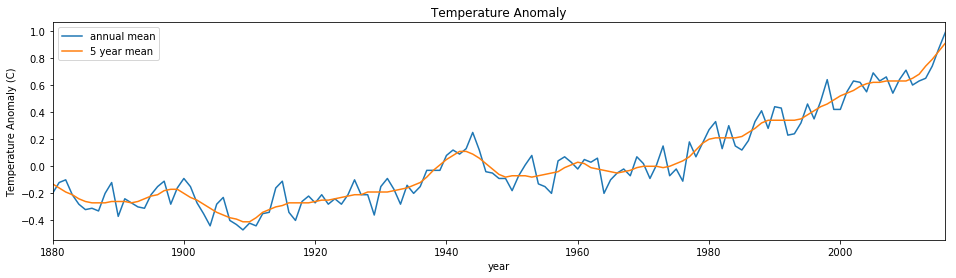

In [25]:
df_tempe.plot(figsize = (16,4))
plt.ylabel('Temperature Anomaly (C)')
plt.title('Temperature Anomaly')

In [26]:
df_tempe_since_1960 = df_tempe[80:]
df_tempe_since_1960

,annual mean,5 year mean
year,,
1960,-0.02,0.03
1961,0.05,0.02
1962,0.03,-0.01
1963,0.06,-0.02
1964,-0.20,-0.03
1965,-0.10,-0.04
1966,-0.05,-0.05
1967,-0.02,-0.04
1968,-0.07,-0.03


### Prepare the training set for anomaly temperature

In [70]:
# create a dataframe for each year
dict_df_temp = {}
range_tempe = range(1960, 2017)
for year in range_tempe:
    year = str(year)
    dict_df_temp[year] = pd.DataFrame()
    # print(year)
    dict_df_temp[year] = wb[['Country Name', year]]
    dict_df_temp[year] = dict_df_temp[year].fillna(0)
    
dict_df_temp[year].head(20)

,Country Name,2016
0,Aruba,41.304000
1,Aruba,43296.000000
2,Aruba,-0.080806
3,Aruba,104822.000000
4,Aruba,0.459929
5,Aruba,0.000000
6,Aruba,0.000000
7,Aruba,-496676.799834
8,Aruba,0.000000
9,Aruba,-816112.100027


In [71]:
dict_df_temp[year].isnull().any(axis=0)

Country Name    False
2016            False
dtype: bool

In [53]:
21120/80

264.0

In [372]:
# create a df of countries in CCPI results
df_ccpi = pd.DataFrame()
for country in country_class_y['Country Name']:
    # filter the CCPI countries
    df1 = wb[wb['Country Name'] == country]
    # append to the df
    df_ccpi = pd.concat( [df_ccpi,df1], ignore_index=True, axis=0)
    
df_ccpi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,NaN,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
6,France,FRA,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,France,FRA,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,NaN
8,France,FRA,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,France,FRA,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN


In [373]:
df_ccpi_clean = pd.DataFrame()
array_flag = np.ones((len(df_ccpi)), dtype=bool)
array_flag


array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [374]:
series_flag = pd.Series(data = array_flag, index=range(len(df_ccpi)))
series_flag

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
4450    True
4451    True
4452    True
4453    True
4454    True
4455    True
4456    True
4457    True
4458    True
4459    True
4460    True
4461    True
4462    True
4463    True
4464    True
4465    True
4466    True
4467    True
4468    True
4469    True
4470    True
4471    True
4472    True
4473    True
4474    True
4475    True
4476    True
4477    True
4478    True
4479    True
Length: 4480, dtype: bool

In [375]:
for indi in sorted(set(list_indi)):
    series_flag = (series_flag & (df_ccpi['Indicator Name'] != indi))


In [377]:
df_ccpi_clean = df_ccpi[series_flag]

In [378]:
df_ccpi_clean_reset = df_ccpi_clean.reset_index(drop=True)

In [379]:
df_ccpi_clean_reset

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
6,France,FRA,"Improved water source, urban (% of urban popul...",SH.H2O.SAFE.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
7,France,FRA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,2.850000e+01,2.700000e+01,2.570000e+01,2.450000e+01,2.340000e+01,2.230000e+01,...,4.400000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.400000e+00,4.400000e+00,4.300000e+00,NaN
8,France,FRA,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,8.947808e+00,...,1.800299e+00,1.686713e+00,1.464522e+00,1.781917e+00,1.840716e+00,1.818997e+00,1.627160e+00,1.730898e+00,1.736259e+00,1.478701e+00
9,France,FRA,Ease of doing business index (1=most business-...,IC.BUS.EASE.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+01,2.900000e+01


In [380]:
df_ccpi_clean_reset = df_ccpi_clean_reset.fillna(0)
df_ccpi_clean_reset.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0.000000e+00
6,France,FRA,"Improved water source, urban (% of urban popul...",SH.H2O.SAFE.UR.ZS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0.000000e+00
7,France,FRA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,2.850000e+01,2.700000e+01,2.570000e+01,2.450000e+01,2.340000e+01,2.230000e+01,...,4.400000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.400000e+00,4.400000e+00,4.300000e+00,0.000000e+00


In [381]:
df_ccpi_clean_reset.iloc[:,4:61].T

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
1960,61.880,28968650.0,2.424503,46814237.0,1.229610,0.0,0.0,28.5,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1961,62.607,29703735.0,2.505858,47444751.0,1.337853,0.0,0.0,27.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.530309,40.084849,861700.0
1962,63.489,30550684.0,2.811428,48119649.0,1.412470,0.0,0.0,25.7,0.000000,0.0,...,0.0,0.0,0.0,0.000000,59.0,0.000000,0.0,0.539613,40.094153,861900.0
1963,64.702,31576957.0,3.304057,48803680.0,1.411512,0.0,0.0,24.5,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.548916,40.104387,862120.0
1964,65.898,32586168.0,3.146026,49449403.0,1.314427,0.0,0.0,23.4,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.558220,40.117877,862410.0
1965,67.071,33551445.0,2.919203,50023774.0,1.154839,0.0,0.0,22.3,8.947808,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.567524,40.127646,862620.0
1966,68.225,34459572.0,2.670688,50508717.0,0.964756,0.0,0.0,21.4,8.736554,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.576827,40.137880,862840.0
1967,69.357,35313433.0,2.447662,50915456.0,0.802060,0.0,0.0,20.6,8.668568,0.0,...,0.0,0.0,0.0,0.000000,59.0,0.000000,0.0,0.586131,40.147184,863040.0
1968,70.238,36015275.0,1.967972,51276054.0,0.705733,0.0,0.0,19.9,8.342099,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.600087,40.163931,863400.0
1969,70.648,36481398.0,1.285933,51638260.0,0.703901,0.0,0.0,19.1,7.717706,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.614042,40.180212,863750.0


In [72]:
# features matrix

X_tempe = pd.DataFrame()

for year in range_tempe:
    year = str(year)
    # axis 1 = concat to the right column of the original df
    X_tempe = pd.concat([X_tempe,dict_df_temp[year][year]], ignore_index=True, axis=1) 
    # print(dict_df_temp[year][year])
    
X_tempe.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [382]:
# X_tempe_train = X_tempe.T
X_tempe_train = df_ccpi_clean_reset.iloc[:,4:61].T
X_tempe_train = X_tempe_train.reset_index(drop=True)
dataset_tempe = X_tempe_train[X_tempe_train.columns.values]
dataset_tempe.head(20)



,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,61.880,28968650.0,2.424503,46814237.0,1.229610,0.0,0.0,28.5,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,62.607,29703735.0,2.505858,47444751.0,1.337853,0.0,0.0,27.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.530309,40.084849,861700.0
2,63.489,30550684.0,2.811428,48119649.0,1.412470,0.0,0.0,25.7,0.000000,0.0,...,0.0,0.0,0.0,0.000000,59.0,0.0,0.0,0.539613,40.094153,861900.0
3,64.702,31576957.0,3.304057,48803680.0,1.411512,0.0,0.0,24.5,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.548916,40.104387,862120.0
4,65.898,32586168.0,3.146026,49449403.0,1.314427,0.0,0.0,23.4,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.558220,40.117877,862410.0
5,67.071,33551445.0,2.919203,50023774.0,1.154839,0.0,0.0,22.3,8.947808,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.567524,40.127646,862620.0
6,68.225,34459572.0,2.670688,50508717.0,0.964756,0.0,0.0,21.4,8.736554,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.576827,40.137880,862840.0
7,69.357,35313433.0,2.447662,50915456.0,0.802060,0.0,0.0,20.6,8.668568,0.0,...,0.0,0.0,0.0,0.000000,59.0,0.0,0.0,0.586131,40.147184,863040.0
8,70.238,36015275.0,1.967972,51276054.0,0.705733,0.0,0.0,19.9,8.342099,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.600087,40.163931,863400.0
9,70.648,36481398.0,1.285933,51638260.0,0.703901,0.0,0.0,19.1,7.717706,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.614042,40.180212,863750.0


In [383]:
# y_tempe_train = df_tempe_since_1960[['annual mean']]
y_tempe_train = df_tempe_since_1960[['5 year mean']]
y_tempe_train = y_tempe_train.reset_index(drop=True)
y_tempe_train.head()

,5 year mean
0,0.03
1,0.02
2,-0.01
3,-0.02
4,-0.03


In [384]:
dataset_tempe['target'] = y_tempe_train 
dataset_tempe

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,target
0,61.880,28968650.0,2.424503,46814237.0,1.229610,0.0,0.0,28.5,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.03
1,62.607,29703735.0,2.505858,47444751.0,1.337853,0.0,0.0,27.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.530309,40.084849,861700.0,0.02
2,63.489,30550684.0,2.811428,48119649.0,1.412470,0.0,0.0,25.7,0.000000,0.0,...,0.0,0.0,0.000000,59.0,0.000000,0.0,0.539613,40.094153,861900.0,-0.01
3,64.702,31576957.0,3.304057,48803680.0,1.411512,0.0,0.0,24.5,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.548916,40.104387,862120.0,-0.02
4,65.898,32586168.0,3.146026,49449403.0,1.314427,0.0,0.0,23.4,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.558220,40.117877,862410.0,-0.03
5,67.071,33551445.0,2.919203,50023774.0,1.154839,0.0,0.0,22.3,8.947808,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.567524,40.127646,862620.0,-0.04
6,68.225,34459572.0,2.670688,50508717.0,0.964756,0.0,0.0,21.4,8.736554,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.576827,40.137880,862840.0,-0.05
7,69.357,35313433.0,2.447662,50915456.0,0.802060,0.0,0.0,20.6,8.668568,0.0,...,0.0,0.0,0.000000,59.0,0.000000,0.0,0.586131,40.147184,863040.0,-0.04
8,70.238,36015275.0,1.967972,51276054.0,0.705733,0.0,0.0,19.9,8.342099,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.600087,40.163931,863400.0,-0.03
9,70.648,36481398.0,1.285933,51638260.0,0.703901,0.0,0.0,19.1,7.717706,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.614042,40.180212,863750.0,-0.01


In [385]:
from sklearn.linear_model import LinearRegression
LR_tempe = LinearRegression(fit_intercept=True)
LR_tempe.fit(X_tempe_train, y_tempe_train)
dataset_tempe['predicted'] = LR_tempe.predict(X_tempe_train)

In [386]:
dataset_tempe

,0,1,2,3,4,5,6,7,8,9,...,3128,3129,3130,3131,3132,3133,3134,3135,target,predicted
0,61.880,28968650.0,2.424503,46814237.0,1.229610,0.0,0.0,28.5,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.03,3.000000e-02
1,62.607,29703735.0,2.505858,47444751.0,1.337853,0.0,0.0,27.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.530309,40.084849,861700.0,0.02,2.000000e-02
2,63.489,30550684.0,2.811428,48119649.0,1.412470,0.0,0.0,25.7,0.000000,0.0,...,0.0,0.000000,59.0,0.000000,0.0,0.539613,40.094153,861900.0,-0.01,-1.000000e-02
3,64.702,31576957.0,3.304057,48803680.0,1.411512,0.0,0.0,24.5,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.548916,40.104387,862120.0,-0.02,-2.000000e-02
4,65.898,32586168.0,3.146026,49449403.0,1.314427,0.0,0.0,23.4,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.558220,40.117877,862410.0,-0.03,-3.000000e-02
5,67.071,33551445.0,2.919203,50023774.0,1.154839,0.0,0.0,22.3,8.947808,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.567524,40.127646,862620.0,-0.04,-4.000000e-02
6,68.225,34459572.0,2.670688,50508717.0,0.964756,0.0,0.0,21.4,8.736554,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.576827,40.137880,862840.0,-0.05,-5.000000e-02
7,69.357,35313433.0,2.447662,50915456.0,0.802060,0.0,0.0,20.6,8.668568,0.0,...,0.0,0.000000,59.0,0.000000,0.0,0.586131,40.147184,863040.0,-0.04,-4.000000e-02
8,70.238,36015275.0,1.967972,51276054.0,0.705733,0.0,0.0,19.9,8.342099,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.600087,40.163931,863400.0,-0.03,-3.000000e-02
9,70.648,36481398.0,1.285933,51638260.0,0.703901,0.0,0.0,19.1,7.717706,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.614042,40.180212,863750.0,-0.01,-1.000000e-02


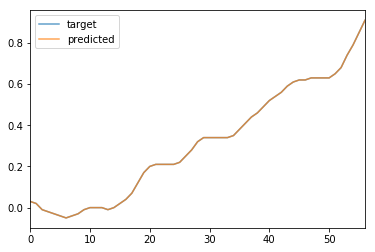

In [387]:
# krough
dataset_tempe[['target', 'predicted']].plot(alpha=0.7);

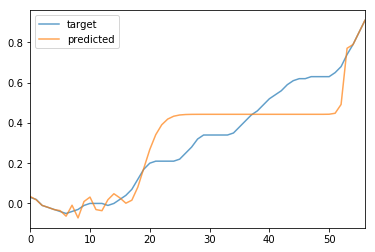

In [353]:
# krough
dataset_tempe[['target', 'predicted']].plot(alpha=0.7);

In [388]:
X_tempe_train

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,61.880,28968650.0,2.424503,46814237.0,1.229610,0.0,0.0,28.5,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,62.607,29703735.0,2.505858,47444751.0,1.337853,0.0,0.0,27.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.530309,40.084849,861700.0
2,63.489,30550684.0,2.811428,48119649.0,1.412470,0.0,0.0,25.7,0.000000,0.0,...,0.0,0.0,0.0,0.000000,59.0,0.000000,0.0,0.539613,40.094153,861900.0
3,64.702,31576957.0,3.304057,48803680.0,1.411512,0.0,0.0,24.5,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.548916,40.104387,862120.0
4,65.898,32586168.0,3.146026,49449403.0,1.314427,0.0,0.0,23.4,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.558220,40.117877,862410.0
5,67.071,33551445.0,2.919203,50023774.0,1.154839,0.0,0.0,22.3,8.947808,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.567524,40.127646,862620.0
6,68.225,34459572.0,2.670688,50508717.0,0.964756,0.0,0.0,21.4,8.736554,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.576827,40.137880,862840.0
7,69.357,35313433.0,2.447662,50915456.0,0.802060,0.0,0.0,20.6,8.668568,0.0,...,0.0,0.0,0.0,0.000000,59.0,0.000000,0.0,0.586131,40.147184,863040.0
8,70.238,36015275.0,1.967972,51276054.0,0.705733,0.0,0.0,19.9,8.342099,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.600087,40.163931,863400.0
9,70.648,36481398.0,1.285933,51638260.0,0.703901,0.0,0.0,19.1,7.717706,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.614042,40.180212,863750.0


In [389]:
X_tempe_train.columns.values

array([   0,    1,    2, ..., 3133, 3134, 3135], dtype=int64)

In [390]:
params_tempe = pd.Series(LR_tempe.coef_[0], index=X_tempe_train.columns.values)
params_tempe


0      -9.277435e-15
1      -8.498195e-09
2       1.210365e-16
3      -5.844035e-09
4       4.257069e-15
5       3.051976e-14
6       3.051966e-14
7       4.990533e-15
8      -6.745081e-14
9       2.519343e-15
10      6.732916e-15
11     -9.918866e-15
12      1.210668e-14
13     -1.349808e-13
14     -2.699618e-13
15      5.646196e-12
16      2.809252e-12
17     -1.614334e-14
18      8.543283e-12
19     -9.121967e-15
20      7.651796e-11
21      1.530584e-12
22      2.363685e-10
23      1.527229e-11
24      1.499356e-14
25      6.076080e-10
26      4.384767e-17
27      1.144551e-16
28      2.134641e-14
29     -2.960436e-15
            ...     
3106   -1.701302e-16
3107   -1.949938e-16
3108    2.226891e-14
3109   -2.587939e-13
3110    5.742727e-11
3111   -7.074586e-12
3112    3.089714e-15
3113   -5.852273e-13
3114   -3.041592e-10
3115   -1.032051e-13
3116    1.646570e-12
3117    5.551321e-13
3118    1.565422e-14
3119    9.125900e-18
3120    2.014270e-20
3121    5.542391e-11
3122    2.014

In [391]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([LR_tempe.fit(*resample(X_tempe_train, y_tempe_train)).coef_ for i in range(1000)], 0)

In [394]:
params_tempe.max()*10**20

1661739067900.688

In [395]:
params_tempe.min()*10**20

-1258608328474.815

In [410]:
params_tempe.nlargest(10)

2841    1.661739e-08
3027    1.322289e-08
2913    1.070096e-08
2561    7.612202e-09
3025    7.230507e-09
841     6.794549e-09
1345    5.106069e-09
265     5.031586e-09
1982    4.906241e-09
2430    4.739799e-09
dtype: float64

In [409]:
params_tempe.nsmallest(10)

825    -1.258608e-08
713    -1.079554e-08
974    -9.341869e-09
1      -8.498195e-09
975    -7.221495e-09
2131   -6.691979e-09
2577   -6.571435e-09
3      -5.844035e-09
2635   -5.442391e-09
953    -4.917392e-09
dtype: float64

In [408]:
df_ccpi_clean_reset.loc[953,:]

Country Name             Indonesia
Country Code                   IDN
Indicator Name    Urban population
Indicator Code         SP.URB.TOTL
1960                   1.28054e+07
1961                   1.33594e+07
1962                   1.39374e+07
1963                   1.45426e+07
1964                   1.51759e+07
1965                   1.58378e+07
1966                    1.6531e+07
1967                   1.72555e+07
1968                   1.80089e+07
1969                   1.87925e+07
1970                   1.96034e+07
1971                   2.04453e+07
1972                   2.15232e+07
1973                   2.27115e+07
1974                   2.39545e+07
1975                    2.5252e+07
1976                   2.66051e+07
1977                    2.8011e+07
1978                   2.94779e+07
1979                   3.10061e+07
1980                   3.26013e+07
1981                   3.44458e+07
1982                   3.64727e+07
1983                   3.85865e+07
1984                

In [362]:
params_tempe.nlargest(10)*10**20

713     85.2212
1800    76.2888
1777    72.7209
2953    65.4664
1001    51.1563
2561    49.3293
993     40.8005
2271    35.6495
2274    29.6701
2666    28.0583
dtype: object

In [363]:
params_tempe.nsmallest(10)*10**20

553     -377.86
881    -206.921
217     -31.441
2113   -29.2458
1231    -27.942
2248   -26.2467
2281   -19.1493
2729   -14.7859
1369   -12.4808
1953   -11.7939
dtype: object

In [411]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
RFEmodel = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(RFEmodel, 56)
rfe = rfe.fit(X_tempe_train, dataset_tempe.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

ValueError: Unknown label type: 'continuous'

In [413]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(dataset.data, dataset.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False  True]
[4 2 3 1]


In [415]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Classify the class of the countries

### Prepare the training set

In [169]:
# load label Climate Change Performance Index
# the data were extracted from https://germanwatch.org/en/download/16484.pdf
country_class_y = pd.read_csv('world_bank/CCPI_2017.csv', sep=',', header=0) 
country_class_y.head()

# rename the CCPI column to Country Name, so it could be 'merge' on this column name
country_class_y.columns = ['Country Name', 'Label']
label_int = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})
country_class_y.head()

,Country Name,Label
0,France,Good
1,Sweden,Good
2,United Kingdom,Good
3,Cyprus,Good
4,Luxembourg,Good


In [146]:
# create a df of countries in CCPI results
df_ccpi = pd.DataFrame()
for country in country_class_y['Countries']:
    # filter the CCPI countries
    df1 = wb_inter[wb_inter['Country Name'] == country]
    # append to the df
    df_ccpi = pd.concat( [df_ccpi,df1], ignore_index=True, axis=0)
    
df_ccpi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,-8.781107e+09,-7.283146e+09,-6.016658e+09,-4.949738e+09,-4.054324e+09,-3.305806e+09,...,0.000000e+00,0.000000e+00,8.373016e-02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.616667e+00,6.521429e+01
6,France,FRA,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,France,FRA,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,...,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01
8,France,FRA,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,France,FRA,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


In [83]:
print(df_ccpi.shape)
print(df1.shape)
# check the number of the countries
df_ccpi.shape[0] / df1.shape[0]

(4480, 61)
(80, 61)


56.0

In [86]:
#years = list(df_ccpi.columns[49:61])
years = list(df_ccpi.columns[4:61])
years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [166]:
df_ccpi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,-8.781107e+09,-7.283146e+09,-6.016658e+09,-4.949738e+09,-4.054324e+09,-3.305806e+09,...,0.000000e+00,0.000000e+00,8.373016e-02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.616667e+00,6.521429e+01
6,France,FRA,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,France,FRA,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,...,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01
8,France,FRA,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,France,FRA,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


In [153]:
df_ccpi[:80].isnull().any(axis=1).sum()

4

In [179]:
df_ccpi[i:i+80]['Indicator Name']

4400                        Urban population (% of total)
4401                                     Urban population
4402                   Urban population growth (annual %)
4403                                    Population, total
4404                         Population growth (annual %)
4405    Poverty headcount ratio at $1.90 a day (2011 P...
4406    Prevalence of underweight, weight for age (% o...
4407    Improved sanitation facilities (% of populatio...
4408          Community health workers (per 1,000 people)
4409    Improved water source (% of population with ac...
4410    Improved water source, urban (% of urban popul...
4411    Improved water source, rural (% of rural popul...
4412      Mortality rate, under-5 (per 1,000 live births)
4413    Primary completion rate, total (% of relevant ...
4414    School enrollment, primary and secondary (gros...
4415                  Agriculture, value added (% of GDP)
4416    CPIA public sector management and institutions...
4417    Ease o

In [178]:
df_ccpi[i:i+80]['Indicator Name'][df_ccpi[i:i+80].isnull().any(axis=1)]

4405    Poverty headcount ratio at $1.90 a day (2011 P...
4408          Community health workers (per 1,000 people)
4416    CPIA public sector management and institutions...
4429    Disaster risk reduction progress score (1-5 sc...
4437    Total greenhouse gas emissions (% change from ...
4469    Agricultural irrigated land (% of total agricu...
Name: Indicator Name, dtype: object

In [176]:
df_ccpi[i:i+80].isnull().any(axis=1)

4400    False
4401    False
4402    False
4403    False
4404    False
4405     True
4406    False
4407    False
4408     True
4409    False
4410    False
4411    False
4412    False
4413    False
4414    False
4415    False
4416     True
4417    False
4418    False
4419    False
4420    False
4421    False
4422    False
4423    False
4424    False
4425    False
4426    False
4427    False
4428    False
4429     True
        ...  
4450    False
4451    False
4452    False
4453    False
4454    False
4455    False
4456    False
4457    False
4458    False
4459    False
4460    False
4461    False
4462    False
4463    False
4464    False
4465    False
4466    False
4467    False
4468    False
4469     True
4470    False
4471    False
4472    False
4473    False
4474    False
4475    False
4476    False
4477    False
4478    False
4479    False
Length: 80, dtype: bool

In [214]:
list_indi = []
for c, i in enumerate(range(0,4480,80)):
    print(c, df_ccpi['Country Name'][i],'\t',df_ccpi[i:i+80].isnull().any(axis=1).sum())
    for i in df_ccpi[i:i+80]['Indicator Name'][df_ccpi[i:i+80].isnull().any(axis=1)]:
        print(i)
        list_indi.append(i)
        

0 France 	 4
Prevalence of underweight, weight for age (% of children under 5)
Community health workers (per 1,000 people)
CPIA public sector management and institutions cluster average (1=low to 6=high)
Disaster risk reduction progress score (1-5 scale; 5=best)
1 Sweden 	 3
Prevalence of underweight, weight for age (% of children under 5)
Community health workers (per 1,000 people)
CPIA public sector management and institutions cluster average (1=low to 6=high)
2 United Kingdom 	 4
Community health workers (per 1,000 people)
Primary completion rate, total (% of relevant age group)
CPIA public sector management and institutions cluster average (1=low to 6=high)
Disaster risk reduction progress score (1-5 scale; 5=best)
3 Cyprus 	 6
Prevalence of underweight, weight for age (% of children under 5)
Community health workers (per 1,000 people)
CPIA public sector management and institutions cluster average (1=low to 6=high)
Population in urban agglomerations of more than 1 million (% of tot

In [217]:
len(set(list_indi))

24

In [222]:
set_saved_ccpi = set(wb_meta_indi['INDICATOR_NAME']) - set(list_indi)

In [226]:
df_ccpi.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [269]:
df_ccpi_clean = pd.DataFrame()
array_flag = np.ones((len(df_ccpi)), dtype=bool)
array_flag


array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [272]:
series_flag = pd.Series(data = array_flag, index=range(len(df_ccpi)))
series_flag

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
4450    True
4451    True
4452    True
4453    True
4454    True
4455    True
4456    True
4457    True
4458    True
4459    True
4460    True
4461    True
4462    True
4463    True
4464    True
4465    True
4466    True
4467    True
4468    True
4469    True
4470    True
4471    True
4472    True
4473    True
4474    True
4475    True
4476    True
4477    True
4478    True
4479    True
Length: 4480, dtype: bool

In [273]:
for indi in sorted(set(list_indi)):
    series_flag = (series_flag & (df_ccpi['Indicator Name'] != indi))


In [279]:
df_ccpi_clean = df_ccpi[series_flag]

In [159]:
for c, i in enumerate(range(0,4480,80)):
    # print(i)
    print(c, df_ccpi['Country Name'][i],'\t',df_ccpi[i:i+80].isnull().any(axis=1).sum())

0 France 	 4
1 Sweden 	 3
2 United Kingdom 	 4
3 Cyprus 	 6
4 Luxembourg 	 6
5 Malta 	 8
6 Portugal 	 4
7 Belgium 	 4
8 Denmark 	 4
9 Switzerland 	 3
10 Latvia 	 5
11 Italy 	 2
12 Croatia 	 4
13 Romania 	 2
14 Lithuania 	 5
15 India 	 1
16 Ireland 	 5
17 Indonesia 	 1
18 Egypt, Arab Rep. 	 4
19 Czech Republic 	 10
20 Greece 	 3
21 Slovak Republic 	 12
22 Netherlands 	 3
23 Mexico 	 2
24 Germany 	 2
25 Slovenia 	 5
26 Finland 	 3
27 South Africa 	 2
28 Spain 	 4
29 Hungary 	 11
30 Poland 	 3
31 Argentina 	 2
32 Bulgaria 	 2
33 Norway 	 4
34 Iceland 	 8
35 Brazil 	 2
36 Austria 	 12
37 Thailand 	 2
38 United States 	 3
39 Malaysia 	 2
40 Ukraine 	 3
41 New Zealand 	 5
42 Algeria 	 1
43 China 	 2
44 Belarus 	 3
45 Estonia 	 4
46 Turkey 	 3
47 Russian Federation 	 4
48 Singapore 	 12
49 Canada 	 2
50 Iran, Islamic Rep. 	 2
51 Australia 	 2
52 Korea, Rep. 	 3
53 Kazakhstan 	 12
54 Japan 	 2
55 Saudi Arabia 	 6


In [155]:
for i in range(0,21120,80):
    #print(i)
    print(wb_inter['Country Name'][i],'\t',wb_interpolated[i:i+80].isnull().any(axis=1).sum())


Aruba 	 30
Afghanistan 	 26
Angola 	 4
Albania 	 3
Andorra 	 46
Arab World 	 12
United Arab Emirates 	 7
Argentina 	 2
Armenia 	 10
American Samoa 	 44
Antigua and Barbuda 	 18
Australia 	 2
Austria 	 12
Azerbaijan 	 10
Burundi 	 24
Belgium 	 4
Benin 	 2
Burkina Faso 	 24
Bangladesh 	 0
Bulgaria 	 2
Bahrain 	 8
Bahamas, The 	 22
Bosnia and Herzegovina 	 6
Belarus 	 3
Belize 	 15
Bermuda 	 33
Bolivia 	 8
Brazil 	 2
Barbados 	 17
Brunei Darussalam 	 10
Bhutan 	 22
Botswana 	 10
Central African Republic 	 25
Canada 	 2
Central Europe and the Baltics 	 11
Switzerland 	 3
Channel Islands 	 68
Chile 	 1
China 	 2
Cote d'Ivoire 	 2
Cameroon 	 3
Congo, Dem. Rep. 	 3
Congo, Rep. 	 2
Colombia 	 2
Comoros 	 15
Cabo Verde 	 12
Costa Rica 	 2
Caribbean small states 	 21
Cuba 	 9
Curacao 	 53
Cayman Islands 	 33
Cyprus 	 6
Czech Republic 	 10
Germany 	 2
Djibouti 	 14
Dominica 	 18
Denmark 	 4
Dominican Republic 	 2
Algeria 	 1
East Asia & Pacific (excluding high income) 	 8
Early-demographic divide

In [170]:
# store as a dictionary: data of CCPI country for each year in one dataframe

dict_df_years = {}
for year in years:
    dict_df_years[year] = df_ccpi[['Country Name','Indicator Name',year]]
    dict_df_years[year] = pd.merge(dict_df_years[year], country_class_y, on="Country Name", how="outer" )
    
dict_df_years[year].head()

,Country Name,Indicator Name,2016,Label
0,France,Urban population (% of total),7.975000e+01,Good
1,France,Urban population,5.334965e+07,Good
2,France,Urban population growth (annual %),6.963089e-01,Good
3,France,"Population, total",6.689611e+07,Good
4,France,Population growth (annual %),4.074910e-01,Good


In [89]:
# the number of features of each country
len(wb_meta_indi['INDICATOR_NAME'])

80

In [204]:
df_ccpi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,-8.781107e+09,-7.283146e+09,-6.016658e+09,-4.949738e+09,-4.054324e+09,-3.305806e+09,...,0.000000e+00,0.000000e+00,8.373016e-02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.616667e+00,6.521429e+01
6,France,FRA,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,France,FRA,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,...,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01
8,France,FRA,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,France,FRA,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


In [205]:
df_ccpi.loc[6][2]

'Prevalence of underweight, weight for age (% of children under 5)'

In [200]:
len(df_ccpi)

4480

In [209]:
# imputation of the data, filling missing value
# we will still have an indicator with NaN value in one category, because the value is NaN for each country
# fillna.mean will not really work
# at the end we will end up deleted these unnecessary category

list_deleted_indi_inter = []
list_saved_indi_inter = []

for i in range(len(df_ccpi)):

    indicator = df_ccpi.loc[i][2] 
    if(df_ccpi.loc[i].isnull().any()):
        list_deleted_indi_inter.append(indicator) 
    else:
        list_saved_indi_inter.append(indicator) 

print(list_deleted_indi_inter)
  

['Prevalence of underweight, weight for age (% of children under 5)', 'Community health workers (per 1,000 people)', 'CPIA public sector management and institutions cluster average (1=low to 6=high)', 'Disaster risk reduction progress score (1-5 scale; 5=best)', 'Prevalence of underweight, weight for age (% of children under 5)', 'Community health workers (per 1,000 people)', 'CPIA public sector management and institutions cluster average (1=low to 6=high)', 'Community health workers (per 1,000 people)', 'Primary completion rate, total (% of relevant age group)', 'CPIA public sector management and institutions cluster average (1=low to 6=high)', 'Disaster risk reduction progress score (1-5 scale; 5=best)', 'Prevalence of underweight, weight for age (% of children under 5)', 'Community health workers (per 1,000 people)', 'CPIA public sector management and institutions cluster average (1=low to 6=high)', 'Population in urban agglomerations of more than 1 million (% of total population)',

In [212]:
len(set(list_deleted_indi_inter))

24

In [213]:
(set(list_deleted_indi_inter))

{'Agricultural irrigated land (% of total agricultural land)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'Cereal yield (kg per hectare)',
 'Community health workers (per 1,000 people)',
 'Disaster risk reduction progress score (1-5 scale; 5=best)',
 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
 'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)',
 'Improved sanitation facilities (% of population with access)',
 'Improved water source, rural (% of rural population with access)',
 'Land area where elevation is below 5 meters (% of total land area)',
 'Other greenhouse gas emissions (% change from 1990)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Population living in areas where elevation is below 5 meters (% of total population)',
 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
 'Prevalence of underweight, weight for age (% of childre

In [172]:
# imputation of the data, filling missing value
# we will still have an indicator with NaN value in one category, because the value is NaN for each country
# fillna.mean will not really work
# at the end we will end up deleted these unnecessary category

list_deleted_indi = {}
list_saved_indi = {}
df_test = {}

for year in years:
    list_deleted_indi[year] = []
    list_saved_indi[year] = []
    df_test[year] = pd.DataFrame()

    for label in country_class_y['Label'].unique():
        for indicator in wb_meta_indi['INDICATOR_NAME']:
            df_temp = pd.DataFrame()
            df_temp = dict_df_years[year][(dict_df_years[year]['Indicator Name'] == indicator) & (dict_df_years[year]['Label'] == label)]
        
            df_temp = df_temp.fillna(df_temp.mean())
            # df_temp.interpolate(method=’polynomial’, order=4)
            # print(len(df_temp))

            if(df_temp[year].isnull().values.all()):
                list_deleted_indi[year].append(indicator) 
            else:
                list_saved_indi[year].append(indicator) 

            df_test[year] = pd.concat([df_test[year],df_temp], ignore_index=True, axis=0)
    print(df_test[year].shape)
  

(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)


In [181]:
df_temp[year]

2399   -1.124707e+20
2479    1.159620e+19
2559   -7.512232e+19
2639   -1.944872e+19
2719   -3.002549e+19
2799    1.646249e+18
2879   -3.623064e+20
2959    3.069159e+18
3039   -3.382910e+20
3119    2.165954e+21
3199   -1.339354e+20
3279    1.513107e+10
3359   -2.532420e+20
3439    5.522565e+20
3519   -9.159287e+20
3599    2.640520e+09
3679   -5.772291e+10
3759   -9.981233e+20
3839    3.728037e+10
3919    1.208311e+18
3999    1.494295e+20
4079   -3.156705e+20
4159    7.869590e+21
4239    8.890080e+17
4319    3.608205e+10
4399    5.583892e+19
4479   -1.060418e+22
Name: 2016, dtype: float64

In [173]:
# check number of indicator for each country
df_test[year].shape[0]/56
4200/56

75.0

The number of indicator is not 80. There are several indicator which only contains NaN as its values. The df_temp is empty in that case.

In [174]:
print(df_test[year].shape)
df_test[year].head(20)

(4200, 4)


,Country Name,Indicator Name,2016,Label
0,France,Urban population (% of total),7.975000e+01,Good
1,Sweden,Urban population (% of total),8.596400e+01,Good
2,United Kingdom,Urban population (% of total),8.283500e+01,Good
3,Cyprus,Urban population (% of total),6.684000e+01,Good
4,Luxembourg,Urban population (% of total),9.043200e+01,Good
5,Malta,Urban population (% of total),9.552900e+01,Good
6,Portugal,Urban population (% of total),6.401700e+01,Good
7,Belgium,Urban population (% of total),9.789700e+01,Good
8,Denmark,Urban population (% of total),8.784700e+01,Good
9,Switzerland,Urban population (% of total),7.399000e+01,Good


In [175]:
set_saved_indi_filter = {}
print('year\tdeleted indicator\tfeatures indicator')
for year in years:
    set_saved_indi_filter[year] = set(wb_meta_indi['INDICATOR_NAME']) - set(list_deleted_indi[year])
    print(year,'\t',len(set(list_deleted_indi[year])),'\t\t\t',len(set_saved_indi_filter[year]))

year	deleted indicator	features indicator
1960 	 7 			 73
1961 	 7 			 73
1962 	 7 			 73
1963 	 7 			 73
1964 	 7 			 73
1965 	 7 			 73
1966 	 7 			 73
1967 	 7 			 73
1968 	 7 			 73
1969 	 7 			 73
1970 	 7 			 73
1971 	 7 			 73
1972 	 7 			 73
1973 	 7 			 73
1974 	 7 			 73
1975 	 7 			 73
1976 	 7 			 73
1977 	 7 			 73
1978 	 7 			 73
1979 	 7 			 73
1980 	 7 			 73
1981 	 7 			 73
1982 	 7 			 73
1983 	 7 			 73
1984 	 7 			 73
1985 	 7 			 73
1986 	 7 			 73
1987 	 7 			 73
1988 	 7 			 73
1989 	 7 			 73
1990 	 7 			 73
1991 	 7 			 73
1992 	 7 			 73
1993 	 7 			 73
1994 	 7 			 73
1995 	 7 			 73
1996 	 7 			 73
1997 	 7 			 73
1998 	 7 			 73
1999 	 7 			 73
2000 	 7 			 73
2001 	 7 			 73
2002 	 7 			 73
2003 	 7 			 73
2004 	 7 			 73
2005 	 7 			 73
2006 	 7 			 73
2007 	 7 			 73
2008 	 7 			 73
2009 	 7 			 73
2010 	 7 			 73
2011 	 7 			 73
2012 	 7 			 73
2013 	 7 			 73
2014 	 7 			 73
2015 	 7 			 73
2016 	 7 			 73


In [115]:
for year in years:
    print(list_deleted_indi[year])
    print()
    
years

['Community health workers (per 1,000 people)', 'CPIA public sector management and institutions cluster average (1=low to 6=high)', 'CO2 emissions from solid fuel consumption (kt) ', 'CO2 emissions from liquid fuel consumption (% of total) ', 'CO2 emissions from liquid fuel consumption (kt) ', 'CO2 emissions from gaseous fuel consumption (% of total) ', 'CO2 emissions from gaseous fuel consumption (kt) ', 'CO2 emissions from solid fuel consumption (kt) ', 'CO2 emissions from liquid fuel consumption (% of total) ', 'CO2 emissions from liquid fuel consumption (kt) ', 'CO2 emissions from gaseous fuel consumption (% of total) ', 'CO2 emissions from gaseous fuel consumption (kt) ', 'CPIA public sector management and institutions cluster average (1=low to 6=high)', 'CO2 emissions from solid fuel consumption (kt) ', 'CO2 emissions from liquid fuel consumption (% of total) ', 'CO2 emissions from liquid fuel consumption (kt) ', 'CO2 emissions from gaseous fuel consumption (% of total) ', 'CO2 e

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [738]:
# nan for entire set of classes for one category is not included in the new cleaned df
df_test_clean = {}
indi_sum = 0
countries_len = 56
for year in years:
    df_test_clean[year] = pd.DataFrame()
    for indi in sorted(set_saved_indi_filter[year]):
        df_temp = df_test[year][df_test[year]['Indicator Name'] == indi]
        df_test_clean[year] = pd.concat([df_test_clean[year], df_temp], ignore_index = True, axis = 0)
    print(df_test_clean[year].shape[0], '=', df_test_clean[year].shape[0]/countries_len, 'x', countries_len)
    indi_sum += df_test_clean[year].shape[0]/countries_len
    
print('total of saved indicator', indi_sum)

3080 = 55.0 x 56
2912 = 52.0 x 56
3080 = 55.0 x 56
3080 = 55.0 x 56
2968 = 53.0 x 56
3472 = 62.0 x 56
2912 = 52.0 x 56
3024 = 54.0 x 56
2408 = 43.0 x 56
2744 = 49.0 x 56
1512 = 27.0 x 56
total of saved indicator 557.0


In [739]:
# 56 country * saved indicator in each year
df_test_clean[year].head()

,Country Name,Indicator Name,2015,Label
0,France,"Agriculture, value added (% of GDP)",1.736259,Good
1,Sweden,"Agriculture, value added (% of GDP)",1.317783,Good
2,United Kingdom,"Agriculture, value added (% of GDP)",0.651453,Good
3,Cyprus,"Agriculture, value added (% of GDP)",2.274382,Good
4,Luxembourg,"Agriculture, value added (% of GDP)",0.237523,Good


In [763]:
# reshape the matrix feature to 56 * number of year * saved indicator for each year

ind = list(country_class_y['Country Name'])
countries_len = len(country_class_y)
Xtrain = pd.DataFrame()
Xdyear = {}

for year in years:    
    col = sorted(set_saved_indi_filter[year])
 
    features_len = len(set_saved_indi_filter[year])

    Xyear = pd.DataFrame(np.zeros(shape = (countries_len , features_len)), columns = col, index = ind)
    for country in country_class_y['Country Name']:
        Xyear.loc[country] = df_test_clean[year][df_test_clean[year]['Country Name'] == country][year].values
    
    Xdyear[year] = Xyear
    Xtrain = pd.concat([Xtrain, Xyear], ignore_index = True, axis = 1) 


In [764]:
Xtrain.shape

(56, 557)

In [765]:
ytrain = country_class_y['Label']
ytrain.shape

(56,)

### Create feature matrix for the test countries

In [954]:
# create a df of countries not in CCPI results
df_rest = pd.DataFrame()
for country in sorted(set(wb['Country Name'])):
    # filter the non CCPI countries
    if country not in country_class_y['Country Name'].values:
        #print(country)
        df1 = wb[wb['Country Name'] == country]
        # append to the df
        df_rest = pd.concat( [df_rest,df1], ignore_index=True, axis=0)


In [956]:
16640/80

208.0

In [957]:
dict_df_rest_years = {}
for year in years:
    dict_df_rest_years[year] = df_rest[['Country Name','Indicator Name',year]]
    #dict_df_rest_years[year] = pd.merge(dict_df_rest_years[year], country_class_y, on="Country Name", how="outer" )
    
dict_df_rest_years[year].head()

,Country Name,Indicator Name,2015
0,Afghanistan,Urban population (% of total),2.670300e+01
1,Afghanistan,Urban population,9.008656e+06
2,Afghanistan,Urban population growth (annual %),4.532395e+00
3,Afghanistan,"Population, total",3.373649e+07
4,Afghanistan,Population growth (annual %),2.943234e+00


In [958]:
df_rest_test = {}

for year in years:
    df_rest_test[year] = pd.DataFrame()

    for indicator in wb_meta_indi['INDICATOR_NAME']:
        df_temp = pd.DataFrame()
        df_temp = dict_df_rest_years[year][(dict_df_rest_years[year]['Indicator Name'] == indicator)]

        # df_temp = df_temp.fillna(0)
        # df_temp.interpolate(method=’polynomial’, order=4)
        # print(len(df_temp))

        df_rest_test[year] = pd.concat([df_rest_test[year],df_temp], ignore_index=True, axis=0)
    print(df_rest_test[year].shape)

(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)
(15600, 3)


In [959]:
15600/208

75.0

In [781]:
df_rest_test[year].head()

,Country Name,Indicator Name,2015
0,Afghanistan,Urban population (% of total),26.703
1,Albania,Urban population (% of total),57.407
2,Algeria,Urban population (% of total),70.727
3,American Samoa,Urban population (% of total),87.202
4,Andorra,Urban population (% of total),85.115


In [960]:
# nan for entire set of classes for one category is not included in the new cleaned df
df_rest_test_clean = {}
indi_sum = 0
countries_len = 208
for year in years:
    df_rest_test_clean[year] = pd.DataFrame()
    for indi in sorted(set_saved_indi_filter[year]):
        df_temp = df_rest_test[year][df_rest_test[year]['Indicator Name'] == indi]
        df_rest_test_clean[year] = pd.concat([df_rest_test_clean[year], df_temp], ignore_index = True, axis = 0)
    print(df_rest_test_clean[year].shape[0], '=', df_rest_test_clean[year].shape[0]/countries_len, 'x', countries_len)
    indi_sum += df_rest_test_clean[year].shape[0]/countries_len
    
print('total of saved indicator', indi_sum)

11440 = 55.0 x 208
10816 = 52.0 x 208
11440 = 55.0 x 208
11440 = 55.0 x 208
11024 = 53.0 x 208
12896 = 62.0 x 208
10816 = 52.0 x 208
11232 = 54.0 x 208
8944 = 43.0 x 208
10192 = 49.0 x 208
5616 = 27.0 x 208
total of saved indicator 557.0


In [961]:
df_rest_test_clean[year].head()

,Country Name,Indicator Name,2015
0,Afghanistan,"Agriculture, value added (% of GDP)",21.400722
1,Albania,"Agriculture, value added (% of GDP)",23.092629
2,American Samoa,"Agriculture, value added (% of GDP)",NaN
3,Andorra,"Agriculture, value added (% of GDP)",NaN
4,Angola,"Agriculture, value added (% of GDP)",NaN


In [962]:
ind = sorted(set(df_rest['Country Name']))
len(ind)

208

In [963]:
# reshape the matrix feature
countries_len = len(ind)
Xtest = pd.DataFrame()
Xdrest_year = {}

for year in years:    
    col = sorted(set_saved_indi_filter[year]) 
    features_len = len(set_saved_indi_filter[year])

    Xyear = pd.DataFrame(np.zeros(shape = (countries_len , features_len)), columns = col, index = ind)
    for country in ind:
        Xyear.loc[country] = df_rest_test_clean[year][df_rest_test_clean[year]['Country Name'] == country][year].values
    
    Xdyear[year] = Xyear
    Xtest = pd.concat([Xtest, Xyear], ignore_index = True, axis = 1) 


In [964]:
print(Xtest.shape)
Xtest.head()

(208, 557)


,0,1,2,3,4,5,6,7,8,9,...,547,548,549,550,551,552,553,554,555,556
Afghanistan,23.000000,5.840148,58.067580,379100.0,31.750991,11.955090,0.135968,0.046604,0.052341,1327.454,...,78.2,91.1,2.943234,13.738461,33736494.0,NaN,0.65171,9008656.0,26.703,4.532395
Albania,100.000000,NaN,39.306569,10770.0,21.234328,19.635036,0.458949,0.189289,0.237679,4253.720,...,94.9,14.0,-0.291206,NaN,2880703.0,106.367561,0.94666,1653725.0,57.407,1.462517
American Samoa,NaN,NaN,25.000000,50.0,NaN,16.500000,NaN,NaN,NaN,NaN,...,100.0,NaN,0.180222,NaN,55537.0,NaN,NaN,48429.0,87.202,0.107431
Andorra,100.000000,NaN,41.914894,197.0,0.419197,5.319149,0.149839,NaN,NaN,575.719,...,100.0,2.8,-1.537836,NaN,78014.0,NaN,NaN,66402.0,85.115,-2.143956
Angola,38.386024,NaN,46.193952,575900.0,NaN,2.646988,0.414408,0.248081,0.278620,19156.408,...,75.4,156.9,3.428021,24.319383,27859305.0,NaN,NaN,12272024.0,44.050,5.205362


In [965]:
Xrf_rest = Xtest.fillna(0) 
Xrf_rest.index.values

array(['Afghanistan', 'Albania', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Armenia', 'Aruba',
       'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'British Virgin Islands',
       'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Cuba', 'Curacao', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethi

## Prediction

###  PCA

(0, 5)

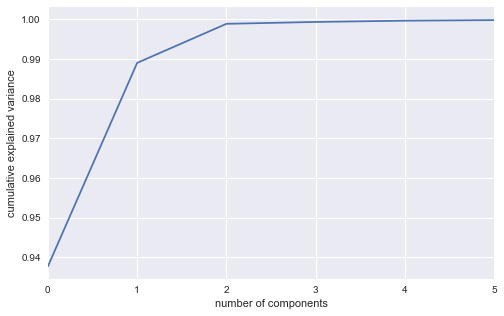

In [913]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xtrain)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)

(0, 5)

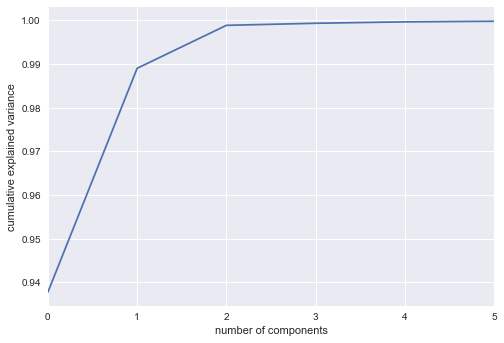

In [834]:
from sklearn.decomposition import RandomizedPCA

Rpca = PCA(svd_solver='randomized').fit(Xtrain)
plt.plot(np.cumsum(Rpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)


In [490]:
pca = PCA(2)
Rpca = PCA(4, svd_solver='randomized')
projected = Rpca.fit_transform(Xtrain)
print(Xtrain.shape)
print(projected.shape)

(56, 557)
(56, 4)


In [491]:
Xtrain = projected

In [493]:
ytrain.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Label, dtype: object

In [494]:
ytrain_color = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})

C:\Users\Gebruiker\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


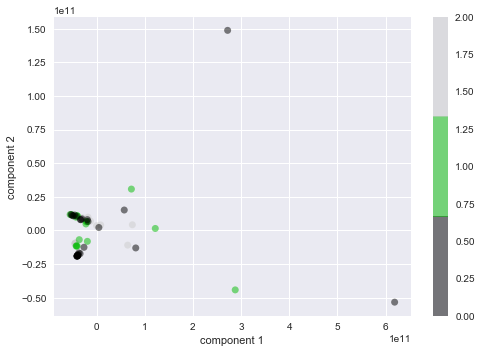

In [495]:
plt.scatter(projected[:, 0], projected[:, 1],
c= ytrain_color, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [496]:
X_new = pca.inverse_transform(projected)
X_new.shape

AttributeError: 'PCA' object has no attribute 'components_'

In [498]:
(X_new > 324000).all(axis = 0).sum()

2

In [499]:
22, 532

(22, 532)

In [502]:
X_new.shape
56*557/(X_new > 1000000).sum()
Xtrain.shape

(56, 4)

#  RF

In [966]:
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,547,548,549,550,551,552,553,554,555,556
France,100.0,5.771953,53.675508,293904.0,1.872929,33.562898,0.151292,0.167011,0.199311,385368.697,...,100.0,4.3,0.439411,22.640799,66624068.0,98.531467,1.018571,52979459.0,79.520,0.730327
Sweden,100.0,1.518968,7.837403,32160.0,1.140894,6.565287,0.114215,0.138508,0.168113,51561.687,...,100.0,3.0,1.057455,15.161259,9799186.0,103.762512,1.090930,8409171.0,85.815,1.232392
United Kingdom,100.0,1.229063,70.086389,169560.0,0.637613,23.680403,0.227460,0.243258,0.278327,542580.321,...,100.0,4.2,0.794968,28.572508,65128861.0,98.531467,1.018571,53791229.0,82.592,1.094476
Cyprus,100.0,20.958084,18.073593,1670.0,3.134870,13.311688,0.332359,0.301781,0.360632,7502.682,...,100.0,2.7,0.750103,22.502284,1160985.0,96.819061,0.996190,776943.0,66.921,0.603794
Luxembourg,100.0,9.614399,49.806950,1290.0,0.400196,23.166023,0.244865,0.280155,0.363891,11547.383,...,100.0,1.9,2.359951,22.502284,569604.0,98.531467,1.018571,513555.0,90.160,2.679903


In [967]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sns; sns.set()

from sklearn.grid_search import GridSearchCV

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xtrain, ytrain, random_state=0, test_size=0.75)
RF = RandomForestClassifier(random_state=0)


In [968]:
RF.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [969]:
param_grid_rf = {'n_estimators': [1, 10, 100, 1000, 2000, 5000]}
grid_rf = GridSearchCV(RF, param_grid_rf)


In [970]:
%time grid_rf.fit(Xtrain, ytrain)
print(grid_rf.best_params_)

Wall time: 27.9 s
{'n_estimators': 100}


In [971]:
RF = grid_rf.best_estimator_


In [972]:
RF.fit(Xrf_train, yrf_train)
yrf_pred = RF.predict(Xrf_test)


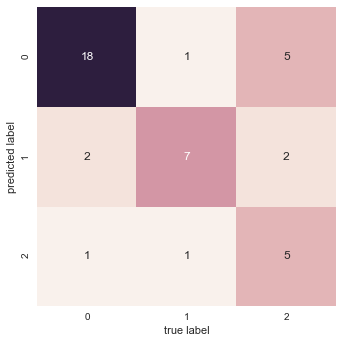

In [973]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yrf_test, yrf_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [974]:
from sklearn import metrics
print(metrics.classification_report(yrf_pred, yrf_test))

             precision    recall  f1-score   support

        Bad       0.86      0.75      0.80        24
       Good       0.78      0.64      0.70        11
    Neutral       0.42      0.71      0.53         7

avg / total       0.76      0.71      0.73        42



In [975]:
from sklearn.cross_validation import cross_val_score
cross_val_score(RF, Xtrain, ytrain, cv=4).mean()

0.74908424908424909

## Predict class of the rest of the countries

In [976]:
yrf_pred_rest = RF.predict(Xrf_rest)

In [978]:
pd.DataFrame(yrf_pred_rest, index = list(Xrf_rest.index.values), columns = ['Class'])

,Class
Afghanistan,Good
Albania,Good
American Samoa,Good
Andorra,Good
Angola,Good
Antigua and Barbuda,Good
Arab World,Bad
Armenia,Good
Aruba,Good
Azerbaijan,Bad


#  SVM

In [145]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc = SVC(kernel='rbf', class_weight='balanced')

In [146]:
svc.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [148]:
from sklearn.grid_search import GridSearchCV
param_grid_svc = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [1E-25, 1E-20 , 1E-15, 1E-12, 1E-10, 0.00001]}
grid_svc = GridSearchCV(svc, param_grid_svc)

%time grid_svc.fit(Xtrain, ytrain)
print(grid_svc.best_params_)

Wall time: 553 ms
{'C': 50, 'gamma': 1e-20}


In [149]:
svc = grid_svc.best_estimator_

In [150]:
from sklearn.cross_validation import cross_val_score
cross_val_score(svc, Xtrain, ytrain, cv=4)

array([ 0.46666667,  0.64285714,  0.5       ,  0.69230769])

In [151]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc_sig = SVC(kernel='sigmoid')

svc_sig.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [154]:
param_grid_svcsig = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [1E-25, 1E-20 , 1E-15, 1E-12, 1E-10, 0.00001], 'coef0': [-10,-7, -5, -3, -2 , -1,  0, 1, 2]}

In [155]:
grid_svcsig = GridSearchCV(svc_sig, param_grid_svcsig)

%time grid_svcsig.fit(Xtrain, ytrain)
print(grid_svcsig.best_params_)

Wall time: 3.93 s
{'C': 50, 'coef0': 1, 'gamma': 1e-20}


In [156]:
model_svcsig = grid_svcsig.best_estimator_

In [157]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model_svcsig, Xtrain, ytrain, cv=4)



array([ 0.46666667,  0.64285714,  0.42857143,  0.30769231])

#### KMEANS

In [405]:
Xtrain.shape

(56, 2)

In [406]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xtrain)
y_kmeans = kmeans.predict(Xtrain)

In [407]:
y_kmeans

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0])

In [408]:
ytrain_color.values

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [409]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans, ytrain_color.values)

0.44642857142857145

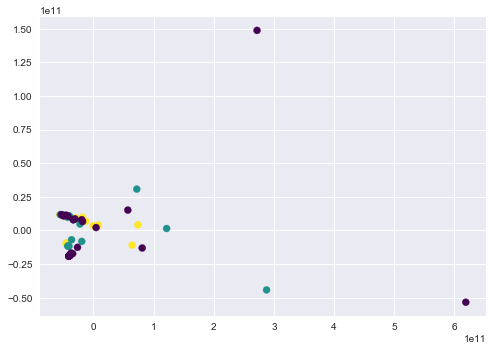

In [410]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain_color.values,
s=50, cmap='viridis');